In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(seed=42) 

In [2]:
raw_info = pd.read_csv(f"/ASD/ahsan_projects/braintypicality/dataset/Data-cohort-VSA.csv")
raw_info

,"VSA demographics,CandID","VSA-CVD demographics,CandID","VSA demographics,Cohort","VSA-CVD demographics,Cohort"
0,108131,108131,IBIS2 High Risk,IBIS2 High Risk
1,360421,.,IBIS2 High Risk,.
2,105477,.,DS SA,.
3,110925,.,DS SA,.
4,123451,.,DS SA,.
...,...,...,...,...
406,.,767411,.,12 month recruit
407,.,808534,.,12 month recruit
408,.,856269,.,12 month recruit
409,.,963992,.,12 month recruit


In [3]:
data = pd.DataFrame(raw_info[["VSA demographics,CandID", "VSA demographics,Cohort"]])
data.columns=["CandID", "Cohort"]
data

,CandID,Cohort
0,108131,IBIS2 High Risk
1,360421,IBIS2 High Risk
2,105477,DS SA
3,110925,DS SA
4,123451,DS SA
...,...,...
406,.,.
407,.,.
408,.,.
409,.,.


In [4]:
data = data.drop(data[data["CandID"] == "."].index)
data

,CandID,Cohort
0,108131,IBIS2 High Risk
1,360421,IBIS2 High Risk
2,105477,DS SA
3,110925,DS SA
4,123451,DS SA
...,...,...
259,883733,12 month recruit
260,886482,12 month recruit
261,902465,12 month recruit
262,903923,12 month recruit


In [5]:
cvd_data = raw_info[["VSA-CVD demographics,CandID", "VSA-CVD demographics,Cohort"]]
cvd_data.columns=["CandID", "Cohort"]
cvd_data = cvd_data.drop(cvd_data[cvd_data["CandID"] == "."].index)
cvd_data

,CandID,Cohort
0,108131,IBIS2 High Risk
124,301941,6 month recruit
125,660372,6 month recruit
126,981407,6 month recruit
264,108372,IBIS2 Low Risk
...,...,...
405,718312,12 month recruit
406,767411,12 month recruit
407,808534,12 month recruit
408,856269,12 month recruit


In [6]:
df = pd.concat([data, cvd_data])
df

,CandID,Cohort
0,108131,IBIS2 High Risk
1,360421,IBIS2 High Risk
2,105477,DS SA
3,110925,DS SA
4,123451,DS SA
...,...,...
405,718312,12 month recruit
406,767411,12 month recruit
407,808534,12 month recruit
408,856269,12 month recruit


In [7]:
inliers = df.query("Cohort == 'Control'")["CandID"].drop_duplicates()
inliers.shape

(89,)

In [8]:
outliers = df.query("Cohort == 'DS SA'")["CandID"].drop_duplicates()
outliers.shape

(53,)

> **INTERSECT WITH SUBJECTS THAT WE ACTUALLY HAVE ON DISK!!!**

#### Grabbing VSA* - Adds post-covid scans to list

In [9]:
import glob
t1_paths = glob.glob("/ASD/Autism/IBIS/Proc_Data/*/VSA*/mri/registered_stx/sMRI/*T1w.nrrd")
t1_paths[:4]

['/ASD/Autism/IBIS/Proc_Data/107524/VSA-CVD/mri/registered_stx/sMRI/stx_107524_VSA-CVD_T1w.nrrd',
 '/ASD/Autism/IBIS/Proc_Data/108131/VSA-CVD/mri/registered_stx/sMRI/stx_108131_VSA-CVD_T1w.nrrd',
 '/ASD/Autism/IBIS/Proc_Data/108372/VSA-CVD/mri/registered_stx/sMRI/stx_108372_VSA-CVD_T1w.nrrd',
 '/ASD/Autism/IBIS/Proc_Data/110940/VSA/mri/registered_stx/sMRI/stx_110940_VSA_T1w.nrrd']

In [10]:
import glob,os
R = re.compile(r"stx_(\d*)_VSA_*")

procd_paths = glob.glob("/DATA/Users/amahmood/braintyp/ibis/*.nii.gz")
len(procd_paths)

316

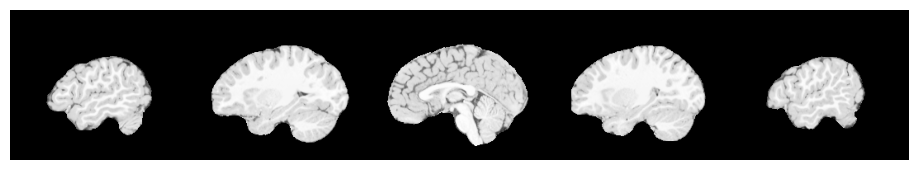

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (-188.0, -224.0, 4.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [11]:
import ants

t1_img, t2_img = ants.image_read(procd_paths[0]).split_channels()
t1_img.plot(nslices=5)
t1_img

In [12]:
R = re.compile(r"(\d*).nii.gz")
_fn = lambda x: R.search(x).group(1)
subject_ids = set(map(_fn, procd_paths))
len(subject_ids)

316

In [13]:
on_disk = inliers.isin(subject_ids)
inlier_keys = inliers[on_disk]
inlier_keys.shape

(78,)

In [14]:
outlier_keys = outliers[outliers.isin(subject_ids)]
outlier_keys.shape

(28,)

In [15]:
inlier_keys.to_csv("ds-sa_inlier_keys.txt", header=None, index=None)
outlier_keys.to_csv("ds-sa_outlier_keys.txt", header=None, index=None)